# Coding assignment: traffic flow

Consider the flow of traffic on a one-lane highway.  How can we describe the general behavior of this system?

We can define the speed of traffic, $V$, in kilometers per hour.  We can also define a traffic density, the number of cars per unit length of highway, $\rho$, in cars per kilometer.  Finally, we can define a traffic flux, or the flow rate of cars, $F$ in cars per hour.  

Now make a few assumptions about how traffic moves.  

If $\rho$ approaches $0$, i.e. there are very few cars on the road, then cars will drive as fast as they can at some $V_{max}$.  

Conversely, if cars are bumper to bumper along the road, then $\rho$ approaches a $\rho_{max}$ and $V$ approaches $0$.

One possible equation to describe this behavior is

$$V=V_{max}\left(1−\frac{\rho}{\rho_{max}}\right)$$

If we describe the traffic flux, $F$ as

$$F=V\rho$$

then

$$F=F(\rho)=V(\rho)\rho=V_{max}\rho\left(1−\frac{\rho}{\rho_{max}}\right)$$

Unsteady traffic flow can be modelled as the non-linear convection of car density, so we apply the non-linear convection equation with V, the wave speed, equal to $∂F/∂ρ$:

$$\frac{∂ρ}{∂t}+\frac{∂F}{∂ρ}\frac{∂ρ}{∂x}=0$$

Applying the chain rule of calculus, this becomes

$$∂ρ∂t+∂F∂x=0$$

where $F$ is defined as above.  

Discretize the traffic flow equation using forward-difference in time and backward-difference in space.  

Examine a stretch of road 11 kilometers long using the following conditions:

$V_{max}=80\;\frac{\text{km}}{\text{hr}}$

$L=11\;\text{km}$

$\rho_{max}=250\;\frac{\text{cars}}{\text{km}}$

$nx=51$

$Δt=.001\;\text{hours}$

## Resolution du devoir

### Résultats de simulation : Partie A

In [199]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [200]:
Vm = 80
L = 11.
rhom = 250
nx = 51
dt = 0.001

In [201]:
dx = L/(nx-1)
A = Vm/rhom
x = numpy.linspace(0,L,nx)
rho0_1 = numpy.ones(nx)*10
rho0_1[10:20] = 50


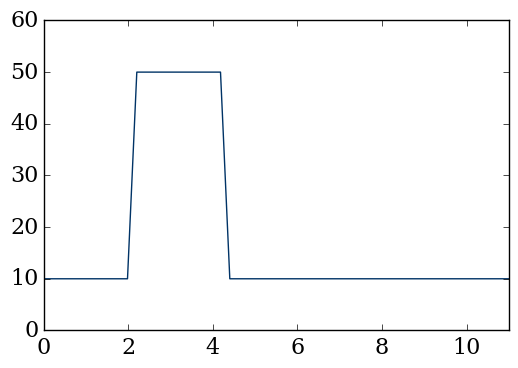

In [202]:
pyplot.plot(x, rho0_1, color='#003366', ls='-', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [203]:
def traffic(nt,rho0,condition):
    rho = rho0.copy()
    for n in range(nt): 
        rhon = rho.copy()
        F = Vm*rho.copy()*(1-rho.copy()/rhom)
        rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
        rho[0] = condition
        
    return rho

La fonction principale est terminée, testons la avec des temps t=0, t=3minutes et t=6 minutes. Ce qui correspond à des intervalles nt=0, nt=50 et nt=100

In [204]:
rho = traffic(50,rho0_1,10)

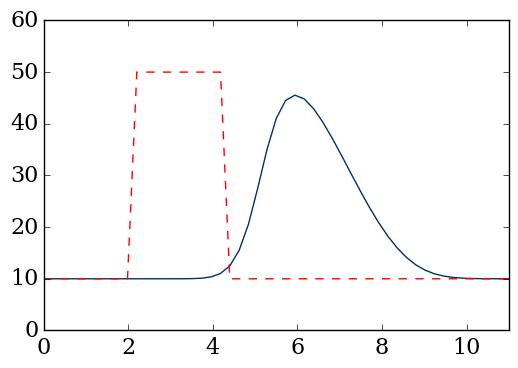

In [205]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_1, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [206]:
V = Vm*(1-rho0_1.copy()/rhom)

In [207]:
min(V)/3.6

17.777777777777779

In [208]:
V = Vm*(1-rho.copy()/rhom)

In [209]:
len(V)

51

In [210]:
numpy.mean(V)/3.6

20.63616619610503

In [211]:
rho = traffic(100,rho0_1,10)

In [212]:
V = Vm*(1-rho.copy()/rhom)

In [213]:
min(V)/3.6

18.784716870896442

### Résultats de simulation : Partie B

In [214]:
Vm = 136

In [215]:
x = numpy.linspace(0,L,nx)
rho0_2 = numpy.ones(nx)*20
rho0_2[10:20] = 50

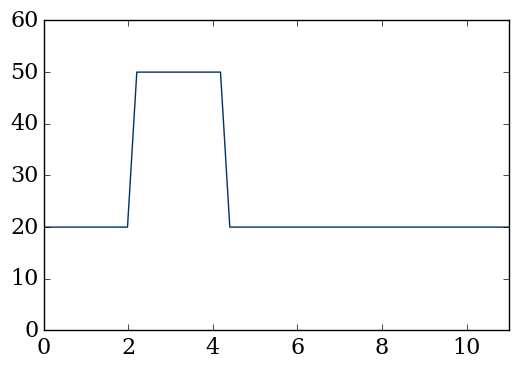

In [216]:
pyplot.plot(x, rho0_2, color='#003366', ls='-', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [217]:
V = Vm*(1-rho0_2.copy()/rhom)

In [218]:
min(V/3.6)

30.222222222222225

In [219]:
rho = traffic(50,rho0_2,20)

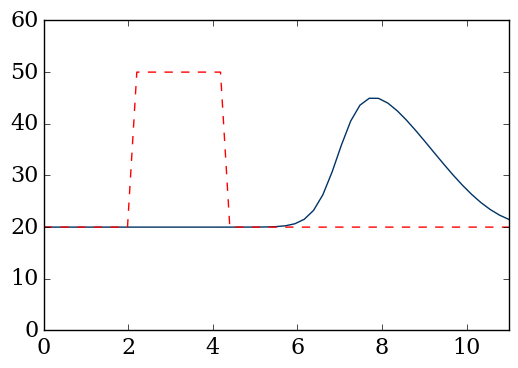

In [220]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=1)
pyplot.plot(x, rho0_2, color='r', ls='--', lw=1)
pyplot.ylim(0,60);
pyplot.xlim(0,11);

In [221]:
V = Vm*(1-rho.copy()/rhom)

In [222]:
numpy.mean(V)/3.6

33.872218190977073

In [223]:
min(V/3.6)

30.986402680569721

# Partie 3 (Bonus)

In [224]:
from matplotlib import animation
from IPython.display import HTML

In [225]:
def diffusion(i):
    line.set_data(x,rho)
    rhon = rho.copy()
    F = Vm*rho.copy()*(1-rho.copy()/rhom)
    rho[1:] = rhon[1:]-dt/dx*(F[1:]-F[:-1])
    rho[0] = 10

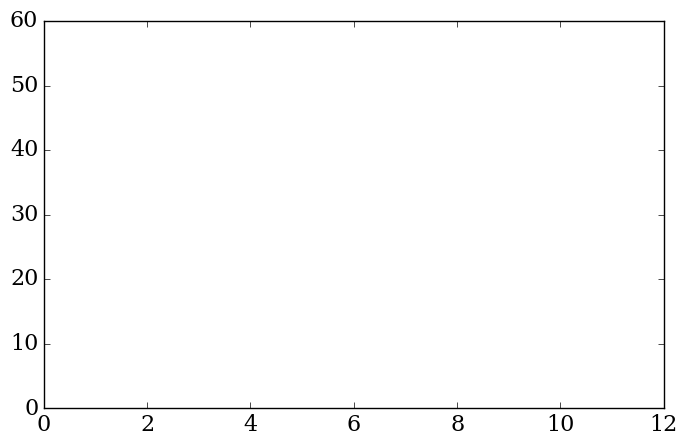

In [226]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,12), ylim=(0,60))
line = ax.plot([], [], color='red', ls='--', lw=1)[0]

In [227]:
rho = rho0_1.copy()

In [228]:
anim = animation.FuncAnimation(fig, diffusion, frames=50, interval=100)

In [229]:
HTML(anim.to_html5_video())

In [230]:
rho = rho0_1.copy()

In [231]:
anim = animation.FuncAnimation(fig, diffusion, frames=100, interval=100)

In [232]:
HTML(anim.to_html5_video())